<a href="https://colab.research.google.com/github/sudam802/NLP_tutorials/blob/main/youtueb_spam_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


rwmoving the Id and checking the missing values

In [3]:
raw_data=pd.read_csv('Youtube-Spam-Dataset.csv')
df=raw_data.drop('COMMENT_ID',axis=1)
print(df.head())
missing_values = df.isnull().sum()
missing_values
df

             AUTHOR                 DATE  \
0         Julius NM  2013-11-07T06:20:48   
1       adam riyati  2013-11-07T12:37:15   
2  Evgeny Murashkin  2013-11-08T17:34:21   
3   ElNino Melendez  2013-11-09T08:28:43   
4            GsMega  2013-11-10T16:05:38   

                                             CONTENT  \
0  Huh, anyway check out this you[tube] channel: ...   
1  Hey guys check out my new channel and our firs...   
2             just for test I have to say murdev.com   
3   me shaking my sexy ass on my channel enjoy ^_^ ﻿   
4            watch?v=vtaRGgvGtWQ   Check this out .﻿   

                       VIDEO_NAME  CLASS  
0  PSY - GANGNAM STYLE(?????) M/V      1  
1  PSY - GANGNAM STYLE(?????) M/V      1  
2  PSY - GANGNAM STYLE(?????) M/V      1  
3  PSY - GANGNAM STYLE(?????) M/V      1  
4  PSY - GANGNAM STYLE(?????) M/V      1  


,AUTHOR,DATE,CONTENT,VIDEO_NAME,CLASS
0,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",PSY - GANGNAM STYLE(?????) M/V,1
1,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,PSY - GANGNAM STYLE(?????) M/V,1
2,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,PSY - GANGNAM STYLE(?????) M/V,1
3,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^ ﻿,PSY - GANGNAM STYLE(?????) M/V,1
4,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .﻿,PSY - GANGNAM STYLE(?????) M/V,1
...,...,...,...,...,...
1951,Katie Mettam,2013-07-13T13:27:39.441000,I love this song because we sing it at Camp al...,Shakira - Waka Waka,0
1952,Sabina Pearson-Smith,2013-07-13T13:14:30.021000,I love this song for two reasons: 1.it is abou...,Shakira - Waka Waka,0
1953,jeffrey jules,2013-07-13T12:09:31.188000,wow,Shakira - Waka Waka,0
1954,Aishlin Maciel,2013-07-13T11:17:52.308000,Shakira u are so wiredo,Shakira - Waka Waka,0


plotting the spam vs legitamet

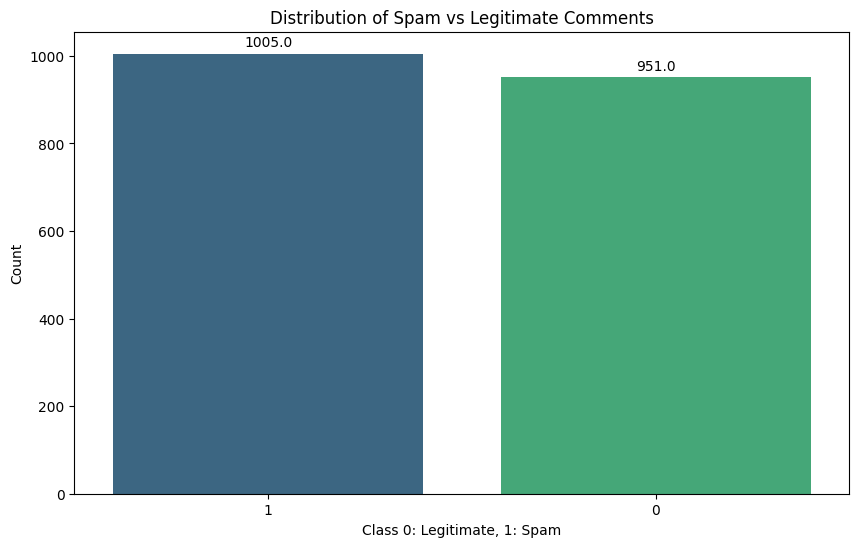

In [4]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x=df['CLASS'].astype(str), hue=df['CLASS'].astype(str), palette='viridis')

# Annotate each bar with the exact value
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Distribution of Spam vs Legitimate Comments')
plt.xlabel('Class 0: Legitimate, 1: Spam')
plt.ylabel('Count')

plt.show()

Visualization of the spread of the words

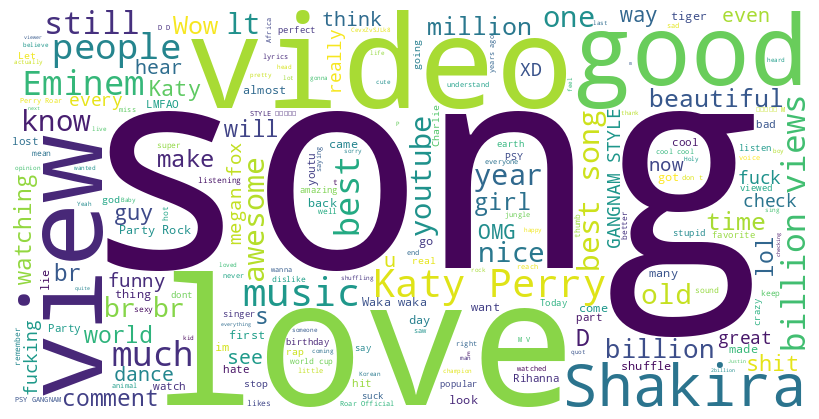

In [5]:
from wordcloud import WordCloud, STOPWORDS
text = ' '.join(df[df['CLASS'] == 0]['CONTENT'])

stopwords=set(STOPWORDS)
# generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords).generate(text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

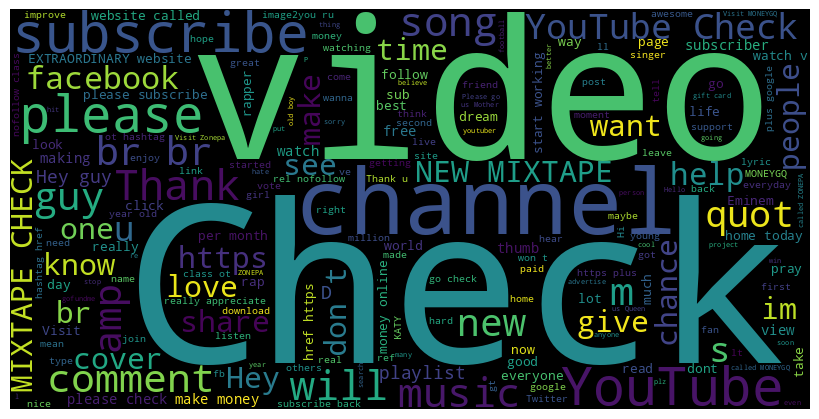

In [6]:
# spam wordcloud
text = ' '.join(df[df['CLASS'] == 1]['CONTENT'])

stopwords=set(STOPWORDS)
# generating the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black', stopwords=stopwords).generate(text)
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

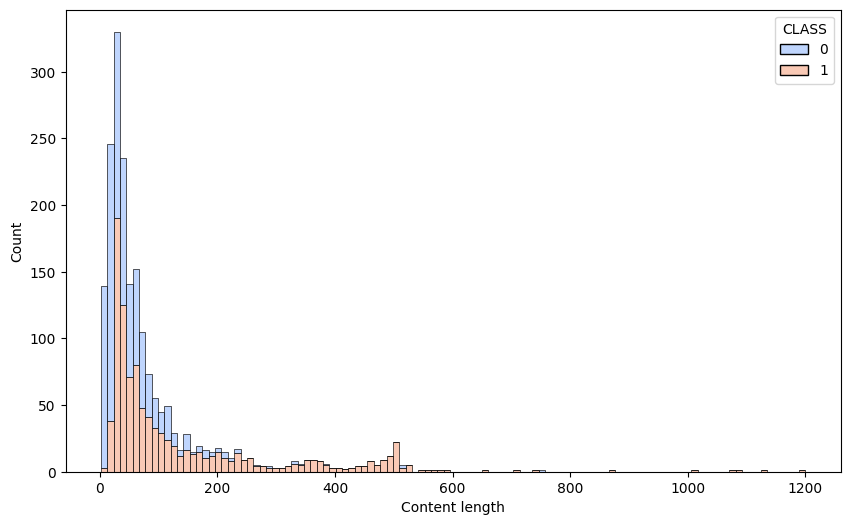

In [7]:
#  adding a new column content length
df['cont_length']=df['CONTENT'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df, x='cont_length', hue='CLASS', multiple='stack', palette='coolwarm')
plt.xlabel('Content length')
plt.ylabel('Count')
plt.show()

In [8]:
# changing the Date column to data and time object


947


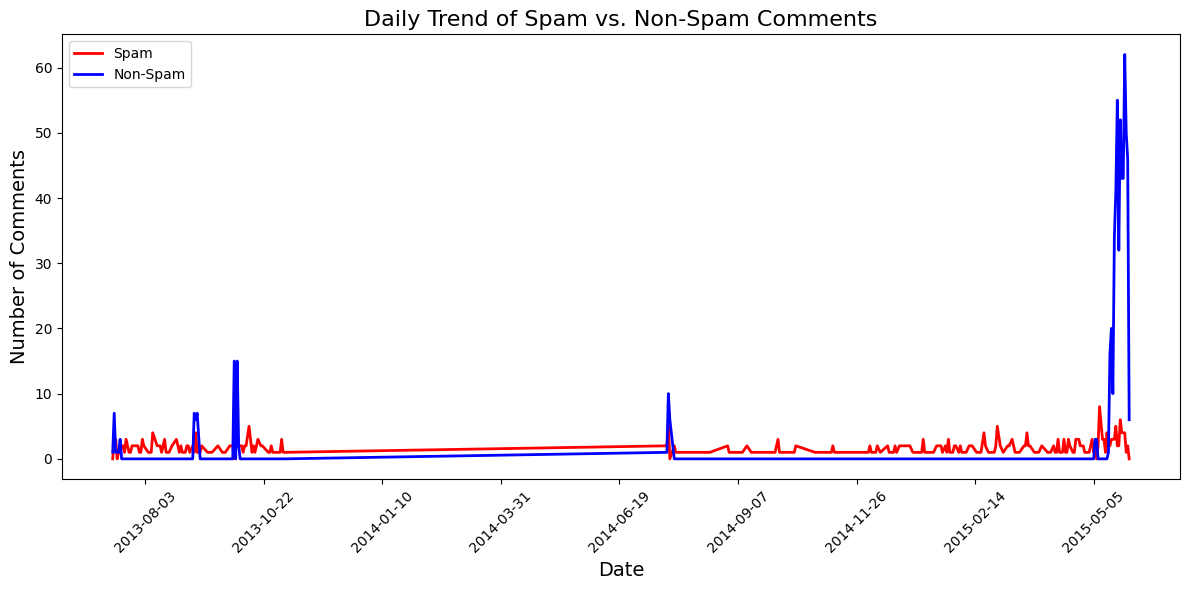

In [9]:
df_copy=df.copy()
df_copy['Date'] = pd.to_datetime(df_copy['DATE'], format='%Y-%m-%dT%H:%M:%S.%f', errors='coerce')
nan_count=df_copy['Date'].dt.date.isna().sum()
print(nan_count)
daily_counts = df_copy.groupby([df_copy['Date'].dt.date, 'CLASS']).size().unstack(fill_value=0)

# Plot the daily trend of spam and non-spam comments
plt.figure(figsize=(12, 6))
plt.plot(daily_counts.index, daily_counts[1], label='Spam', color='red', linewidth=2)
plt.plot(daily_counts.index, daily_counts[0], label='Non-Spam', color='blue', linewidth=2)
plt.title('Daily Trend of Spam vs. Non-Spam Comments', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Comments', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend()

# Show date intervals for better readability
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))  # Adjust number of date ticks on x-axis
plt.tight_layout()
plt.show()

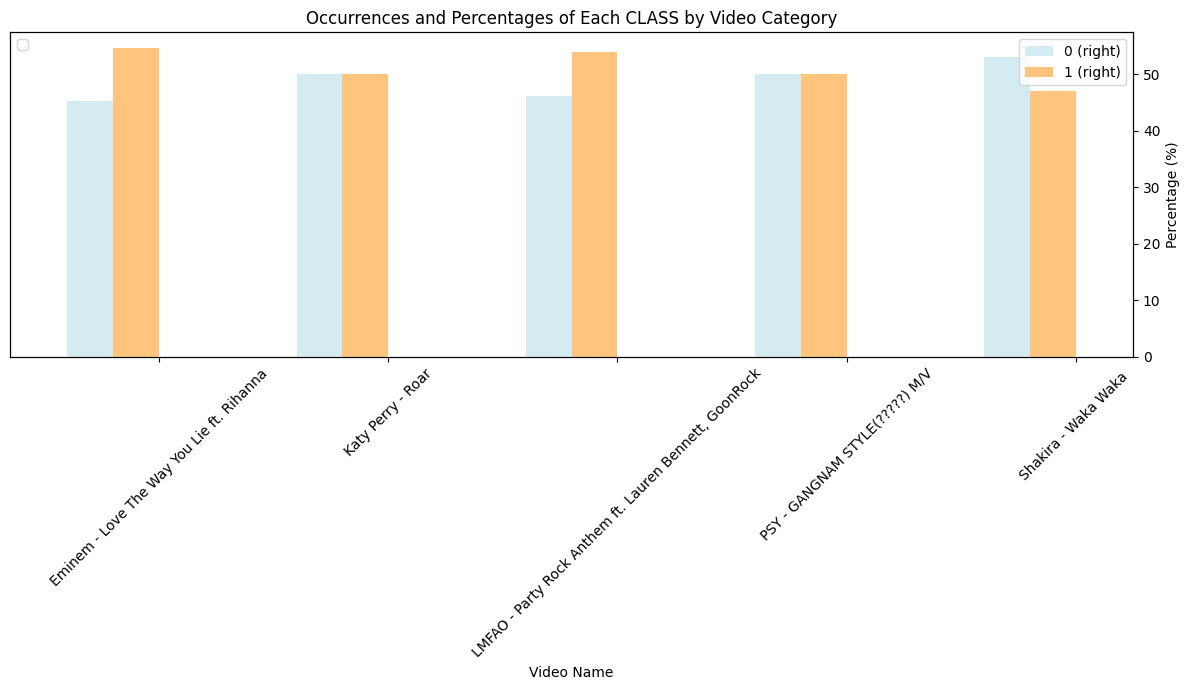

In [10]:


video_category = df_copy.groupby(['VIDEO_NAME', 'CLASS']).size().unstack(fill_value=0)

video_category_percentage = video_category.divide(video_category.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(12, 7))

# video_category.plot(kind='bar', ax=ax, position=0, width=0.4, color=['skyblue', 'orange'], label='Count')

video_category_percentage.plot(kind='bar', ax=ax, position=1, width=0.4, color=['lightblue', 'darkorange'], alpha=0.5, secondary_y=True, label='Percentage')

ax.set_title('Occurrences and Percentages of Each CLASS by Video Category')
ax.set_xlabel('Video Name')
ax.set_ylabel('Count')
ax.right_ax.set_ylabel('Percentage (%)')
ax.set_xticks(range(len(video_category)))
ax.set_xticklabels(video_category.index, rotation=45)
ax.legend(loc='upper left')
ax.right_ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

**Feature Engineering**

In [11]:
# adding the new columns to ths splitted date

*Natural Language processing *

In [16]:
# content of the data set processed
import re
import nltk
from nltk.tokenize import word_tokenize
from collections import Counter

# Download the punkt tokenizer models (only needed once)
nltk.download('punkt')
def clean_text(text):
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove non-alphanumeric characters
    text = text.lower().strip()  # Convert to lowercase
    return text

# Apply cleaning function
df['CONTENT'] = df['CONTENT'].apply(clean_text)

# Tokenize the cleaned text using NLTK
df['TOKENIZED'] = df['CONTENT'].apply(lambda text: word_tokenize(text))
df['TOKENIZED']
# Show the result
tokens=[token for tokens in df['TOKENIZED'] for token in tokens]
print(len(tokens))

from collections import Counter

# ... (your existing code) ...

# Create the vocabulary
vocabulary = set(tokens)

# Create the word index (word-to-index mapping)
word_index = {word: index for index, word in enumerate(vocabulary)}
print(word_index)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


29442
{'world': 0, 'three': 1, 'hay': 2, 'actor': 3, 'saw': 4, 'canal': 5, 'peace': 6, 'complaining': 7, 'flimsy': 8, 'loud': 9, 'literally': 10, 'yearquot': 11, 'gtgtjust': 12, 'ummm': 13, 'hello': 14, 'auditioning': 15, 'superstar': 16, 'mampm': 17, 'lik': 18, 'supposed': 19, 'katycats': 20, 'wisdom': 21, 'flowi39m': 22, 'relnofollow': 23, 'quid': 24, 'noi': 25, 'book': 26, 'angry': 27, 'since': 28, 'loops': 29, 'goal': 30, 'maroon': 31, 'tha': 32, 'renewal': 33, '2124923004': 34, 'isn39t': 35, 'gtgtgtgt': 36, 'topic': 37, 'lunden': 38, 'war': 39, 'quotghostpoet100quot': 40, 'sing': 41, 'like': 42, 'hdtv': 43, 'warsbr': 44, 'channnnnnelll': 45, 'week': 46, 'billions': 47, 'period': 48, 'received': 49, 'about661': 50, 'erection': 51, 'wonderful': 52, '3000000': 53, '7': 54, 'tutorials': 55, 'singing': 56, 'numbering': 57, 'wwwswagbuckscomrefernonturtle02': 58, 'shrek': 59, '5th': 60, 'which': 61, 'yo': 62, 'midnight': 63, 'concerts': 64, 'butt': 65, 'advice': 66, 'phenomenallyricshere

*Model generation*

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression  # Example model
from sklearn.metrics import accuracy_score

X = df['CONTENT']
y = df['CLASS']

# 2. Split into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# 3. Feature Extraction using TF-IDF
vectorizer = TfidfVectorizer(vocabulary=vocabulary)  # Use your created vocabulary
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 4. Model Training
model = LogisticRegression() # You can choose other models (e.g., RandomForestClassifier)
model.fit(X_train_vec, y_train)

# 5. Model Evaluation
y_pred = model.predict(X_test_vec)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8957055214723927
